In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

In [2]:
imovel = pd.read_excel('imoveis.xlsx')
imovel.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [3]:
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [4]:
imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


<AxesSubplot:xlabel='area', ylabel='Count'>

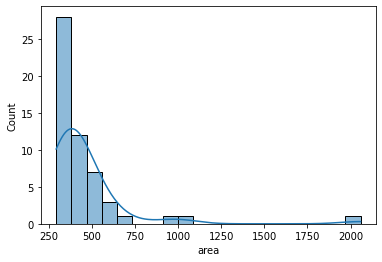

In [10]:
sns.histplot(imovel, x='area', bins=20, kde=True)

<AxesSubplot:xlabel='preco', ylabel='Count'>

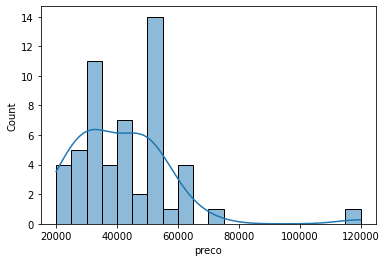

In [9]:
sns.histplot(imovel,x='preco',bins=20,kde=True)

In [11]:
imovel.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


<AxesSubplot:xlabel='area', ylabel='preco'>

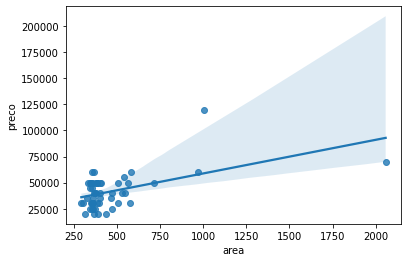

In [12]:
sns.regplot(x='area', y='preco', data=imovel)

In [16]:
scaler = MinMaxScaler()
imovel_norm = pd.DataFrame(scaler.fit_transform(imovel), columns=imovel.columns, index=imovel.index)
imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [17]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<AxesSubplot:xlabel='area', ylabel='preco'>

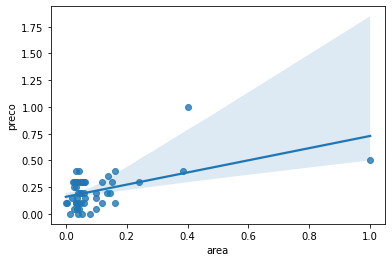

In [18]:
sns.regplot(x='area', y='preco', data=imovel_norm)

In [22]:
formula = 'preco ~ area'
modelo = smf.ols(formula=formula, data=imovel_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Fri, 19 May 2023   Prob (F-statistic):           7.76e-05
Time:                        15:17:13   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.000       0.114       0.206
area           0.5688      0.133      4.291      0.000       0.303       0.835
==============================================================================
Omnibus:                       26.704   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.010
Skew:                           1.395   Prob(JB):                     2.08e-14
Kurtosis:                       7.497   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x = imovel_norm[['area']]
y = imovel_norm[['preco']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_treino, y_treino)

LinearRegression()
r_sq = lr.score(x_treino, y_treino)
print(lr.intercept_)
print(r_sq)

[0.16845989]
0.2754399686961232


In [27]:
y_previsto = lr.predict(x_treino)
print("MAE: ", metrics.mean_absolute_error(y_treino, y_previsto))
print("MSE: ", metrics.mean_squared_error(y_treino, y_previsto))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_treino, y_previsto)))

MAE:  0.1068423059800295
MSE:  0.019987119738590717
RMSE:  0.1413758103021543


In [28]:
lr.fit(x_teste, y_teste)
LinearRegression()

LinearRegression()

In [29]:
y_previsto_teste = lr.predict(x_teste)
print("MAE: ", metrics.mean_absolute_error(y_teste, y_previsto_teste))
print("MSE: ", metrics.mean_squared_error(y_teste, y_previsto_teste))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_teste, y_previsto_teste)))


MAE:  0.10852020952335328
MSE:  0.01746864564020875
RMSE:  0.13216900408268478
